In [531]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

In [532]:
df_train = pd.read_csv('data/train.csv') 
df_train.fillna(0, inplace=True)
df_train.drop(['Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,0.0,1,2,23.4500,0,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [545]:
sex = df_train['Sex']
df_train['Sex'] = LabelEncoder().fit(sex).transform(sex)
df_train['Sex']=[int(not(i)) for i in df_train['Sex']] # switching polarity has nothing to do with feminism, need it for proper correlation
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,0,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,0,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,1,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,0,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,0.0,1,2,23.4500,0,S
889,1,1,1,26.0,0,0,30.0000,C148,C


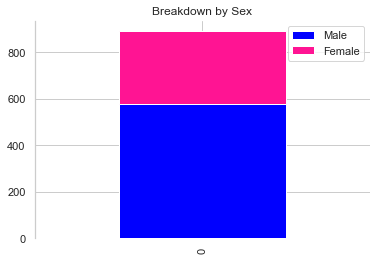

In [546]:
male = df_train.loc[df_train['Sex']==1].count()[1]
female = df_train.loc[df_train['Sex']==0].count()[1]
df_sexes = pd.DataFrame([[male, female]], columns=['Male', 'Female'])
plot = df_sexes.plot.bar(stacked=True, color=['blue', 'deeppink'])
plot.set_title('Breakdown by Sex')
plot.spines['bottom'].set_visible(False)
plot.spines['right'].set_visible(False)
plot.spines['top'].set_visible(False)

Text(0.5, 1.0, 'Survival by Class')

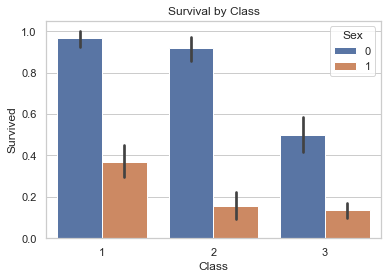

In [547]:
sns.set_theme(style="whitegrid")
plot = sns.barplot(data=df_train, x='Pclass', y='Survived', hue='Sex')
plot.set_xlabel('Class')
plot.set_title('Survival by Class')

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

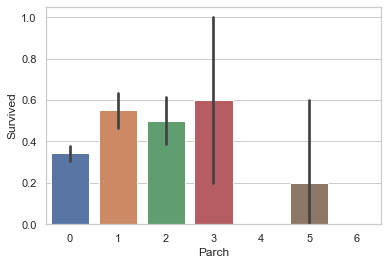

In [548]:
sns.barplot(data=df_train, x='Parch', y='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

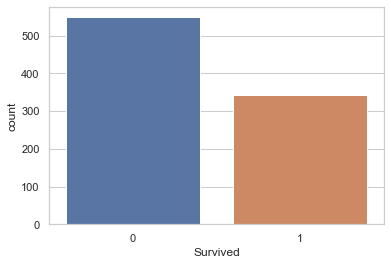

In [549]:
sns.countplot(data=df_train, x='Survived')

<AxesSubplot:>

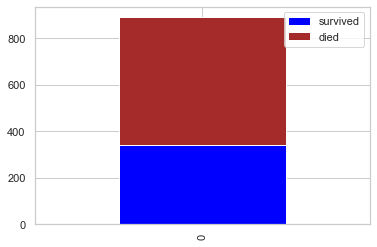

In [550]:
survived = df_train[df_train['Survived']==True].shape[0]
total = df_train.shape[0] 
died = total - survived
df_count = pd.DataFrame([[survived, died]], columns =['survived', 'died'])
df_count.plot.bar(stacked=True, color=['blue', 'brown'])

In [551]:
df_test = pd.read_csv('data/test.csv')
df_test.fillna(0, inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


In [539]:
df_corr = df_corr.corr()
df_corr
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,0,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,0,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,0,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,0.0,1,2,23.4500,0,S
889,1,1,male,26.0,0,0,30.0000,C148,C


<AxesSubplot:>

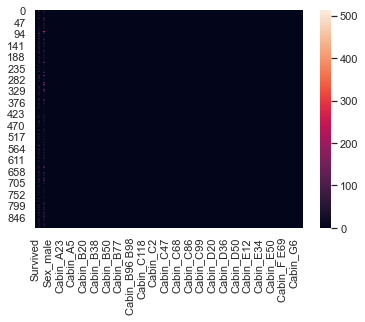

In [541]:
sns.heatmap(df_corr)

In [476]:
predictors = df_corr.columns

In [477]:
model = make_pipeline(OneHotEncoder(), KMeans(n_clusters=2))

In [478]:
clusters=model.fit(df_train[predictors]).predict(df_train[predictors])

In [479]:
df_clusters = df_train[predictors].copy()
df_clusters['Cluster'] = clusters
df_clusters

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cluster
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,1
887,1,1,female,19.0,0,0,30.0000,0
888,0,3,female,0.0,1,2,23.4500,1
889,1,1,male,26.0,0,0,30.0000,0


<AxesSubplot:xlabel='Cluster', ylabel='Survived'>

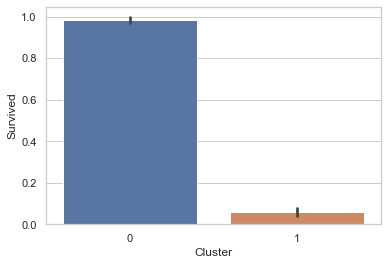

In [480]:
sns.barplot(data=df_clusters, x='Cluster', y='Survived')

In [481]:
temp = df_train[['Sex', 'Survived']]
sex = temp['Sex'].tolist()[:10]
sex


['male',
 'female',
 'female',
 'female',
 'male',
 'male',
 'male',
 'male',
 'female',
 'female']

In [482]:
df_train['Sex']=[int(not(i)) for i in df_train['Sex']]
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,0,S
1,1,1,0,38.0,1,0,71.2833,C85,C
2,1,3,0,26.0,0,0,7.9250,0,S
3,1,1,0,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,S
887,1,1,0,19.0,0,0,30.0000,B42,S
888,0,3,0,0.0,1,2,23.4500,0,S
889,1,1,0,26.0,0,0,30.0000,C148,C
